In [92]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import random

random.seed(10)

In [93]:
input_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data"

In [94]:

df = pd.read_csv(os.path.join(input_dir,r"welfare_data_test_ch3.csv"))

In [95]:
df = df.drop(["index","level_0"],axis=1)

In [96]:
df_reviewed = df[df["is_reviewed"]==1].reset_index().drop(["index"],axis=1)


# Get Ex-ante value - Fixed Effect
Regress rating on hotel characteristics

In [97]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["shareid","market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)
#.drop(["shareid_75909","year_month_2017-11-01"],axis=1)

y = df_reviewed["Rating"]
x = fe_var_df_1.astype(float)
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1008, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1838: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 3.454e-11
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               1.00
Time:                        01:34:19   Log-Likelihood:                -21445.
No. Observations:               44339   AIC:                         4.490e+04
Df Residuals:                   43334   BIC:                         5.364e+04
Df Model:                        1004                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -4.453e+10        nan        nan        nan         nan         nan
shareid_75909                                  6.627e+10   3.73e+15   1.78e-05      1.000    -7.3e+15     7.3e+15
shareid_80022                                 -6.365e+10   5.68e+15  -1.12e-05      1.000   -1.11e+16    1.11e+16
shareid_80596                                 -6.365e+10   1.28e+16  -4.96e-06      1.000   -2.51e+16    2.51e+16
shareid_80713                                  6.627e+10   2.33e+16   2.85e-06      1.000   -4.56e+16    4.56e+16
shareid_81037                                  6.627e+10   1.68e+16   3.94e-06      1.000   -3.29e+16    3.29e+16
shareid_81154                                 -6.365e+10        nan        nan        nan         nan         nan
shareid_81425                                  6.627e+10   2.92e+16   2.27e-06      1.000   -5.72e+16    5.72e+16
shareid_81685                                  6.627e+10   2.88e+16    2.3e-06      1.000   -5.65e+16    5.65e+16
shareid_81769                                 -6.365e+10   2.25e+16  -2.83e-06      1.000   -4.41e+16    4.41e+16
shareid_82026                                 -6.365e+10   2.79e+16  -2.28e-06      1.000   -5.48e+16    5.48e+16
shareid_82381                                 -6.365e+10   1.98e+16  -3.22e-06      1.000   -3.88e+16    3.88e+16
shareid_82442                                  6.627e+10        nan        nan        nan         nan         nan
shareid_82557                                  6.627e+10   8.98e+15   7.38e-06      1.000   -1.76e+16    1.76e+16
shareid_82658                                 -6.365e+10        nan        nan        nan         nan         nan
shareid_83062                                  1.854e+10   3.04e+15    6.1e-06      1.000   -5.96e+15    5.96e+15
shareid_83265                                 -6.365e+10        nan        nan        nan         nan         nan
shareid_83582                                 -6.365e+10        nan        nan        nan         nan         nan
shareid_83784                                  1.854e+10   7.76e+15   2.39e-06      1.000   -1.52e+16    1.52e+16
shareid_84076                                 -6.365e+10   1.63e+16   -3.9e-06      1.000    -3.2e+16     3.2e+16
shareid_84172                                  6.627e+10        nan        nan        nan         nan         nan
shareid_84259                                  6.627e+10        nan        nan        nan         nan         nan
shareid_84581                                  1.854e+10   1.73e+15   1.07e-05      1.000    -3.4e+15     3.4e+15
shareid_84600                                  6.627e+10        nan        nan        nan         nan         nan
share

In [98]:
df_reviewed["exante_rating_baseline"] = results.fittedvalues
#df_reviewed["exante_rating"] = 5*(df_reviewed["exante_rating_fit"]-df_reviewed["exante_rating_fit"].min())/\
#(df_reviewed["exante_rating_fit"].max()-df_reviewed["exante_rating_fit"].min())

In [99]:
#df_2016["exante_rating_baseline"] = df_2016["exante_rating_baseline"]*df_2016["is_reviewed"]

In [100]:
df = df.merge(df_reviewed[["shareid","month","year","exante_rating_baseline"]],\
             on=["shareid","month","year"], how="left")

In [101]:
df["exante_rating_baseline"] = df["exante_rating_baseline"].fillna(0)


In [102]:
df_2016 = df[df["year"]==2016].reset_index().drop(["index"],axis=1)

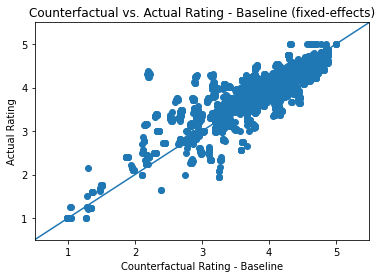

In [103]:
plt.scatter(df_2016["exante_rating_baseline"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - Baseline")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - Baseline (fixed-effects)")
plt.show()

# Get Ex-ante value - Less Observed characteristics 

In [104]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= [
        "Operation","Scale","Class",\
         "Location","market_year_month"]

x_fe = OH.fit_transform(df_reviewed[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)

con_var_list = ["OpenDate"]
con_var_df = df_reviewed[con_var_list]
x = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
x = sm.add_constant(x)

#x = fe_var_df_1.astype(float)
#x = sm.add_constant(x)

y = df_reviewed["Rating"]


model = sm.OLS(y, x)
results = model.fit(cov_type="cluster",cov_kwds={"groups":df_reviewed["shareid"]})
results.summary()

/Users/juju/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 558, but rank is 368
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     131.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:34:25   Log-Likelihood:                -41465.
No. Observations:               44339   AIC:                         8.403e+04
Df Residuals:                   43787   BIC:                         8.884e+04
Df Model:                         551                                         
Covariance Type:              cluster                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.9653      1.159     -5.146      0.000      -8.237      -3.694
OpenDate                                          0.0076      0.001      6.775      0.000       0.005       0.010
Operation_1                                      -2.3122      0.434     -5.322      0.000      -3.164      -1.461
Operation_2                                      -2.2015      0.443     -4.970      0.000      -3.070      -1.333
Operation_3                                      -1.4517      0.287     -5.061      0.000      -2.014      -0.889
Scale_1                                          -0.5701      0.182     -3.126      0.002      -0.928      -0.213
Scale_2                                          -0.8081      0.165     -4.893      0.000      -1.132      -0.484
Scale_3                                          -0.3542      0.187     -1.898      0.058      -0.720       0.012
Scale_4                                          -0.9735      0.215     -4.521      0.000      -1.396      -0.551
Scale_5                                          -1.3332      0.237     -5.630      0.000      -1.797      -0.869
Scale_6                                          -0.4745      0.266     -1.783      0.075      -0.996       0.047
Scale_7                                          -1.4517      0.287     -5.061      0.000      -2.014      -0.889
Class_1                                          -0.6726      0.214     -3.137      0.002      -1.093      -0.252
Class_2                                          -0.7238      0.233     -3.100      0.002      -1.181      -0.266
Class_3                                          -1.2082      0.222     -5.450      0.000      -1.643      -0.774
Class_4                                          -0.7374      0.204     -3.621      0.000      -1.136      -0.338
Class_5                                          -0.5630      0.220     -2.560      0.010      -0.994      -0.132
Class_6                                          -2.0604      0.310     -6.639      0.000      -2.669      -1.452
Location_1                                       -1.3705      0.293     -4.683      0.000      -1.944      -0.797
Location_2                                       -1.3979      0.299     -4.674      0.000      -1.984      -0.812
Location_3                                       -1.5024      0.290     -5.176      0.000      -2.071      -0.933
Location_5                                       -1.6945      0.315     -5.388      0.000      -2.311      -1.078
market_year_month_2002-01-01Chicago, IL           1.6300      0.097     16.836      0.000       1.440       1.820
market_year_month_2002-01-01Miami/Hialeah, FL     1.1176      0.075     14.864      0.000       0.970       1.265
marke

In [105]:
df_reviewed["exante_rating_obs_less"] = results.fittedvalues

df = df.merge(df_reviewed[["shareid","month","year","exante_rating_obs_less"]],\
             on=["shareid","month","year"], how="left")

df["exante_rating_obs_less"] = df["exante_rating_obs_less"].fillna(0)

In [106]:
df_2016 = df[df["year"]==2016].reset_index().drop(["index"],axis=1)

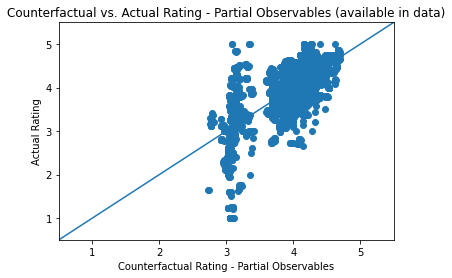

In [107]:
plt.scatter(df_2016["exante_rating_obs_less"],df_2016["Rating"])
plt.xlabel("Counterfactual Rating - Partial Observables")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.ylim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - Partial Observables (available in data)")
plt.show()

# Get Ex-ante value - Partial observable + Chain Brand

In [108]:
df_chain = df[df["operation"]=="Chain_affiliated"].reset_index().drop(["index"],axis=1)
df_reviewed_chain = df_chain[df_chain["is_reviewed"]==1].reset_index().drop(["index"],axis=1)

In [109]:
df_ind = df[df["operation"]=="Independent"].reset_index().drop(["index"],axis=1)
df_reviewed_ind = df_ind[df_ind["is_reviewed"]==1].reset_index().drop(["index"],axis=1)

In [110]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= [
        "Operation","Scale","Class",\
         "Location","market_year_month"]

x_fe = OH.fit_transform(df_reviewed_ind[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed_ind[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)

con_var_list = ["OpenDate"]
con_var_df = df_reviewed_ind[con_var_list]
x = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
x = sm.add_constant(x)

#x = fe_var_df_1.astype(float)
#x = sm.add_constant(x)

y = df_reviewed_ind["Rating"]


model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     8.147
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:34:27   Log-Likelihood:                -4355.5
No. Observations:                6230   AIC:                             9775.
Df Residuals:                    5698   BIC:                         1.336e+04
Df Model:                         531                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
OpenDate                                          0.0056      0.000     23.119      0.000       0.005       0.006
Operation_3                                      -3.1025      0.197    -15.720      0.000      -3.489      -2.716
Scale_7                                          -3.1025      0.197    -15.720      0.000      -3.489      -2.716
Class_1                                          -0.4918      0.055     -8.867      0.000      -0.601      -0.383
Class_2                                          -0.5432      0.051    -10.596      0.000      -0.644      -0.443
Class_3                                          -1.0452      0.053    -19.656      0.000      -1.149      -0.941
Class_4                                          -0.5567      0.062     -9.029      0.000      -0.678      -0.436
Class_5                                          -0.3646      0.062     -5.900      0.000      -0.486      -0.243
Class_6                                          -0.1010      0.196     -0.515      0.607      -0.485       0.283
Location_1                                       -0.0912      0.082     -1.118      0.264      -0.251       0.069
Location_2                                       -0.2394      0.082     -2.929      0.003      -0.400      -0.079
Location_3                                       -2.1335      0.183    -11.632      0.000      -2.493      -1.774
Location_5                                       -0.6383      0.076     -8.367      0.000      -0.788      -0.489
market_year_month_2002-01-01Miami/Hialeah, FL     1.1630      0.506      2.296      0.022       0.170       2.156
market_year_month_2002-02-01Miami/Hialeah, FL     0.1145      0.358      0.320      0.749      -0.588       0.817
market_year_month_2002-03-01Miami/Hialeah, FL    -0.6355      0.358     -1.774      0.076      -1.338       0.067
market_year_month_2002-04-01Miami/Hialeah, FL    -0.6355      0.358     -1.774      0.076      -1.338       0.067
market_year_month_2002-05-01Chicago, IL           0.6451      0.508      1.270      0.204      -0.351       1.641
market_year_month_2002-05-01Miami/Hialeah, FL    -0.5522      0.358     -1.541      0.123      -1.254       0.150
market_year_month_2002-06-01Chicago, IL           0.6470      0.293      2.205      0.027       0.072       1.222
market_year_month_2002-06-01Miami/Hialeah, FL    -0.5522      0.358     -1.541      0.123      -1.254       0.150
market_year_month_2002-07-01Chicago, IL           0.6470      0.293      2.205      0.027       0.072       1.222
market_year_month_2002-07-01Miami/Hialeah, FL    -0.4522      0.358     -1.262      0.207      -1.154       0.250
market_year_month_2002-08-01Chicago, IL           0.6470      0.293      2.205      0.027       0.072       1.222
marke

In [111]:
df_reviewed_ind["exante_rating_obs_less_brand"] = results.fittedvalues

df_ind = df_ind.merge(df_reviewed_ind[["shareid","month","year","exante_rating_obs_less_brand"]],\
             on=["shareid","month","year"], how="left")

df_ind["exante_rating_obs_less_brand"] = df_ind["exante_rating_obs_less_brand"].fillna(0)

In [112]:
OH = OneHotEncoder(handle_unknown='ignore')

fe_var= ["Chain",
        "Operation","Scale","Class",\
         "Location","market_year_month"]

x_fe = OH.fit_transform(df_reviewed_chain[fe_var]).toarray()
fe_var_cols = OH.fit(df_reviewed_chain[fe_var]).get_feature_names_out().tolist()

fe_var_df_1 = pd.DataFrame(x_fe, columns=fe_var_cols)

con_var_list = ["OpenDate"]
con_var_df = df_reviewed_chain[con_var_list]
x = pd.concat([con_var_df,fe_var_df_1], axis=1).astype(float)
x = sm.add_constant(x)

#x = fe_var_df_1.astype(float)
#x = sm.add_constant(x)

y = df_reviewed_chain["Rating"]


model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     57.38
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:34:31   Log-Likelihood:                -31138.
No. Observations:               38109   AIC:                         6.354e+04
Df Residuals:                   37479   BIC:                         6.892e+04
Df Model:                         629                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.8452      0.222    -26.283      0.000      -6.281      -5.409
OpenDate                                          0.0080      0.000     34.109      0.000       0.008       0.008
Chain_0.0                                        -0.4214      0.036    -11.763      0.000      -0.492      -0.351
Chain_593.0                                       0.0112      0.036      0.314      0.753      -0.058       0.081
Chain_607.0                                       0.0958      0.085      1.122      0.262      -0.072       0.263
Chain_639.0                                      -0.0190      0.049     -0.387      0.699      -0.115       0.077
Chain_677.0                                      -0.3204      0.082     -3.887      0.000      -0.482      -0.159
Chain_817.0                                      -0.2900      0.018    -16.388      0.000      -0.325      -0.255
Chain_823.0                                       0.0681      0.027      2.501      0.012       0.015       0.122
Chain_830.0                                       0.0427      0.019      2.230      0.026       0.005       0.080
Chain_839.0                                      -0.2563      0.018    -13.934      0.000      -0.292      -0.220
Chain_842.0                                      -0.2202      0.017    -12.872      0.000      -0.254      -0.187
Chain_846.0                                      -0.1045      0.035     -2.970      0.003      -0.174      -0.036
Chain_868.0                                       0.2744      0.029      9.526      0.000       0.218       0.331
Chain_871.0                                       0.0070      0.031      0.227      0.820      -0.053       0.067
Chain_887.0                                       0.5703      0.055     10.411      0.000       0.463       0.678
Chain_892.0                                      -0.5647      0.049    -11.506      0.000      -0.661      -0.468
Chain_893.0                                      -0.2861      0.052     -5.499      0.000      -0.388      -0.184
Chain_895.0                                      -1.5788      0.052    -30.101      0.000      -1.682      -1.476
Chain_911.0                                      -0.7694      0.046    -16.617      0.000      -0.860      -0.679
Chain_918.0                                      -0.1626      0.060     -2.729      0.006      -0.279      -0.046
Chain_919.0                                      -0.1623      0.063     -2.578      0.010      -0.286      -0.039
Chain_920.0                                      -0.9570      0.072    -13.236      0.000      -1.099      -0.815
Chain_924.0                                       0.5086      0.026     19.291      0.000       0.457       0.560
Chain

In [113]:
df_reviewed_chain["exante_rating_obs_less_brand"] = results.fittedvalues

df_chain = df_chain.merge(df_reviewed_chain[["shareid","year","month","exante_rating_obs_less_brand"]],\
             on=["shareid","year","month"], how="left")

df_chain["exante_rating_obs_less_brand"] = df_chain["exante_rating_obs_less_brand"].fillna(0)

In [114]:
df = pd.concat([df_ind,df_chain],axis=0).reset_index().drop(["index"],axis=1)

In [115]:
df_2016 = df[df["year"]==2016].reset_index().drop(["index"],axis=1)

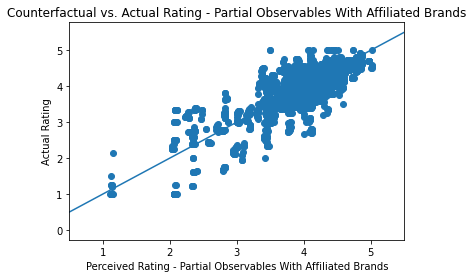

In [116]:
plt.scatter(df_2016["exante_rating_obs_less_brand"],df_2016["Rating"])
plt.xlabel("Perceived Rating - Partial Observables With Affiliated Brands")
plt.ylabel("Actual Rating")
plt.xlim([0.5,5.5])
plt.plot([0.5,5.5], [0.5,5.5])
plt.title("Counterfactual vs. Actual Rating - Partial Observables With Affiliated Brands")
plt.show()

In [117]:
output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data"

df.to_csv(os.path.join(output_dir,r"welfare_data_with_exante_ratings_update_ch3.csv"), index=False)

In [118]:
df[df["is_reviewed"]==True]["exante_rating_random"].mean()

KeyError: 'exante_rating_random'

In [ ]:
df[df["is_reviewed"]==True]["exante_rating_const"].mean()

In [ ]:
df[df["is_reviewed"]==True]["exante_rating_obs"].mean()

In [ ]:
df[df["is_reviewed"]==True]["exante_rating_baseline"].mean()

In [ ]:
len(df_reviewed[(df_reviewed["Rating"]>=3.31)&(df_reviewed["Rating"]<=4.31)])/len(df_reviewed)

In [371]:
df["capacity"]

KeyError: 'capacity'